### Global Thresholding

Mostramos primero  la umbralizacion seleccionando el valor del umbral manualmente como habíamos visto anteriormente

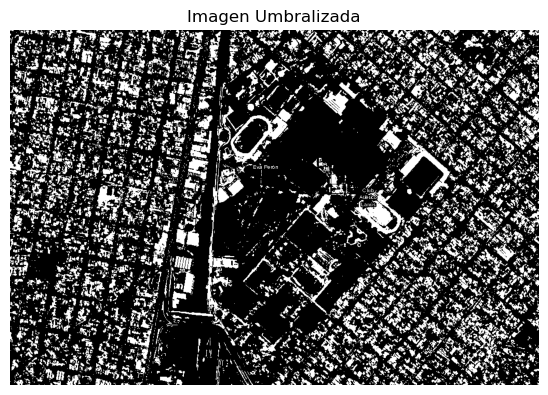

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('lanus.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Imagen Umbralizada')
plt.axis('off')
plt.show()


### Umbralización Global

Este código implementa un algoritmo de **umbralización global** para encontrar el umbral óptimo en una imagen. El objetivo es separar los píxeles en dos grupos (alto y bajo nivel de intensidad) de manera que el umbral final maximice la separación entre ambos. Aquí está el desglose paso a paso:

1. **Seleccionar un umbral inicial**:
   - El umbral `T` se inicializa en un valor intermedio, como 127, pero puede ser cualquier número entre 0 y 255 (excluyendo los extremos).
   - Se define `delta_T` como la diferencia mínima permitida entre dos valores sucesivos de `T`, y `T_prev` se usa para almacenar el umbral de la iteración anterior.

2. **Iteración hasta la convergencia**:
   - El algoritmo repite el cálculo mientras la diferencia entre `T` y `T_prev` sea mayor o igual a `delta_T`.

3. **Clasificar los píxeles en dos grupos usando T**:
   - Se crean dos grupos de píxeles:
     - `G1`: los píxeles con intensidad mayor que `T`.
     - `G2`: los píxeles con intensidad menor o igual a `T`.

4. **Calcular las medias de intensidad de cada grupo**:
   - Se calcula la media de intensidad de cada grupo. Si un grupo está vacío (sin píxeles), se asigna una media de 0.

5. **Actualizar el umbral T**:
   - El nuevo valor de `T` se calcula como el promedio de `m1` (media de `G1`) y `m2` (media de `G2`).
   - Esta actualización permite que el umbral se ajuste progresivamente, buscando un valor que maximice la diferencia entre los dos grupos.

6. **Aplicar el umbral final a la imagen**:
   - Una vez que `T` se estabiliza (la diferencia entre `T` y `T_prev` es menor que `delta_T`), el umbral se aplica a la imagen usando `cv2.threshold`, resultando en una versión binaria de la imagen con píxeles en blanco y negro.

Umbral final después de la convergencia: 113
Umbral calculado por Global: 113.0


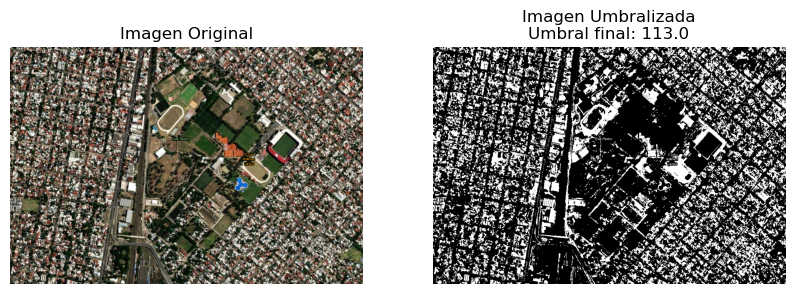

In [45]:

# Cargar la imagen en escala de grises
image = cv2.imread('lanus.png', cv2.IMREAD_GRAYSCALE)

# Paso 1: Seleccionar un umbral inicial
T = 127  # Umbral inicial (puede ser cualquier valor entre 0 y 255, excepto 0 y 255)
delta_T = 1  # Diferencia mínima entre valores de T sucesivos
T_prev = 0  # Para almacenar el umbral anterior y verificar la convergencia

while abs(T - T_prev) >= delta_T:
    T_prev = T

    # Paso 2: Umbralizar la imagen usando T
    G1 = image[image > T]  # Grupo de píxeles con intensidad mayor a T
    G2 = image[image <= T] # Grupo de píxeles con intensidad menor o igual a T

    # Paso 4: Calcular m1 y m2
    if len(G1) > 0:
        m1 = np.mean(G1)
    else:
        m1 = 0

    if len(G2) > 0:
        m2 = np.mean(G2)
    else:
        m2 = 0

    # Paso 5: Actualizar el umbral T
    T = int((m1 + m2) / 2)

# Imprimir el valor final de umbral
print(f"Umbral final después de la convergencia: {T}")

# Aplicar el umbral final a la imagen
umbral_valor, thresholded_image = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)

# Imprimir el valor de umbral calculado por Global
print(f"Umbral calculado por Global: {umbral_valor}")

# Visualizar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen umbralizada
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Imagen Umbralizada\nUmbral final: {umbral_valor}')
plt.axis('off')

plt.show()


### Agregar Ruido Gaussiano

**sigma = var ** 0.5**: Calcula la desviación estándar (`sigma`) del ruido gaussiano a partir de la varianza, dado que `sigma` es la raíz cuadrada de `var`.

**gauss = np.random.normal(mean, sigma, imagen.shape)**: Genera una matriz de ruido gaussiano con la misma forma que la imagen, utilizando `np.random.normal`. Los valores de la matriz tienen una media (`mean`) y desviación estándar (`sigma`), simulando un ruido gaussiano.

**imagen_ruido = imagen + gauss * 255**: Agrega el ruido gaussiano a la imagen. Multiplica `gauss` por 255 para que el ruido esté en el mismo rango de intensidad que la imagen (de 0 a 255).

**imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)**: Asegura que los valores de los píxeles estén dentro del rango válido (0 a 255) usando `np.clip`, para evitar que se desborden. Luego, convierte la imagen resultante al tipo `uint8` para que tenga el formato adecuado para ser guardada o visualizada.

Umbral calculado por Global: 120.0


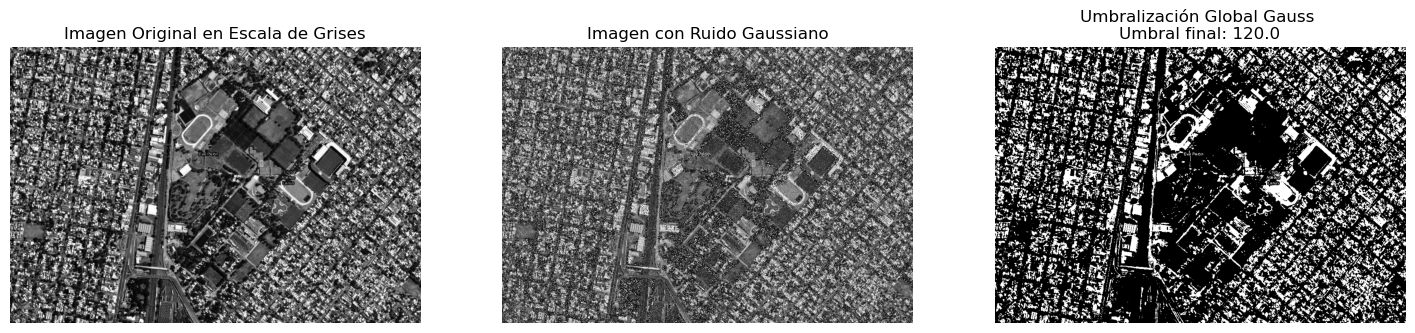

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
gray_image = cv2.imread('lanus.png', cv2.IMREAD_GRAYSCALE)

# Función para agregar ruido gaussiano
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    # Genera ruido gaussiano
    gaussian_noise = np.random.normal(mean, stddev, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Aplicar el ruido gaussiano a la imagen en escala de grises
imagen_ruido_gaussiano = add_gaussian_noise(gray_image, 0, 25, 70)

# Paso 1: Seleccionar un umbral inicial
T = 127  # Umbral inicial (puede ser cualquier valor entre 0 y 255, excepto 0 y 255)
delta_T = 1  # Diferencia mínima entre valores de T sucesivos
T_prev = 0  # Para almacenar el umbral anterior y verificar la convergencia

while abs(T - T_prev) >= delta_T:
    T_prev = T

    # Paso 2: Umbralizar la imagen usando T
    G1 = imagen_ruido_gaussiano[imagen_ruido_gaussiano > T]  # Grupo de píxeles con intensidad mayor a T
    G2 = imagen_ruido_gaussiano[imagen_ruido_gaussiano <= T] # Grupo de píxeles con intensidad menor o igual a T

    # Paso 4: Calcular m1 y m2
    if len(G1) > 0:
        m1 = np.mean(G1)
    else:
        m1 = 0

    if len(G2) > 0:
        m2 = np.mean(G2)
    else:
        m2 = 0

    # Paso 5: Actualizar el umbral T
    T = int((m1 + m2) / 2)

# Aplicar el umbral final a la imagen
umbral_valor_gaussiano, imagen_global_gaussiana = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)

# Imprimir el valor de umbral calculado por Global
print(f"Umbral calculado por Global: {umbral_valor_gaussiano}")

# Mostrar la imagen original, la imagen con ruido Gaussiano y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido Gaussiano
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_gaussiano, cmap='gray')
plt.title('Imagen con Ruido Gaussiano')
plt.axis('off')

# Imagen umbralizada Global
plt.subplot(1, 3, 3)
plt.imshow(imagen_global_gaussiana, cmap='gray')
plt.title(f"Umbralización Global Gauss \nUmbral final: {umbral_valor_gaussiano}")
plt.axis("off")

plt.show()


### Agregar Ruido Exponencial Multiplicativo

**expo = np.random.exponential(scale, imagen.shape)**: Genera una matriz de ruido exponencial con la misma forma que la imagen, usando `np.random.exponential`. Los valores en la matriz siguen una distribución exponencial con una escala específica (`scale`).

**imagen_ruido = imagen * expo**: Multiplica la imagen original por el ruido exponencial, afectando los valores de los píxeles y generando una imagen con ruido aplicado.

**imagen_ruido = imagen_ruido / np.max(imagen_ruido) * 255**: Normaliza la imagen ruidosa dividiendo por su valor máximo y multiplicando por 255, para que los valores resultantes estén en el rango de intensidad de 0 a 255.

**imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)**: Asegura que todos los valores de píxeles estén dentro del rango válido (0 a 255) usando `np.clip`, y convierte la imagen resultante al tipo `uint8` para que pueda ser guardada o visualizada correctamente.

Umbral calculado por Global: 100.0


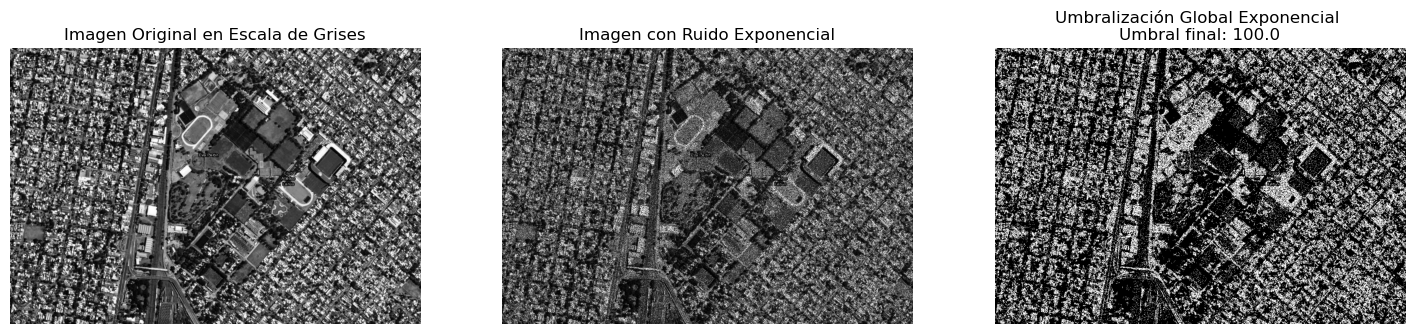

In [47]:
# Función para agregar ruido exponencial multiplicativo
def add_exponential_noise(image, scale, contamination_percentage):
    # Genera ruido exponencial
    exponential_noise = np.random.exponential(scale, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] * exponential_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Aplicar el ruido exponencial a la imagen en escala de grises
imagen_ruido_exponencial = add_exponential_noise(gray_image, 1.0, 50)



# Paso 1: Seleccionar un umbral inicial
T = 127  # Umbral inicial (puede ser cualquier valor entre 0 y 255, excepto 0 y 255)
delta_T = 1  # Diferencia mínima entre valores de T sucesivos
T_prev = 0  # Para almacenar el umbral anterior y verificar la convergencia

while abs(T - T_prev) >= delta_T:
    T_prev = T

    # Paso 2: Umbralizar la imagen usando T
    G1 = imagen_ruido_exponencial[imagen_ruido_exponencial > T]  # Grupo de píxeles con intensidad mayor a T
    G2 = imagen_ruido_exponencial[imagen_ruido_exponencial <= T] # Grupo de píxeles con intensidad menor o igual a T

    # Paso 4: Calcular m1 y m2
    if len(G1) > 0:
        m1 = np.mean(G1)
    else:
        m1 = 0

    if len(G2) > 0:
        m2 = np.mean(G2)
    else:
        m2 = 0

    # Paso 5: Actualizar el umbral T
    T = int((m1 + m2) / 2)

# Aplicar el umbral final a la imagen
umbral_valor_exponencial, imagen_global_exponencial = cv2.threshold(imagen_ruido_exponencial, T, 255, cv2.THRESH_BINARY)

# Imprimir el valor de umbral calculado por Global
print(f"Umbral calculado por Global: {umbral_valor_exponencial}")

# Mostrar la imagen original, la imagen con ruido exponencial y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido exponencial
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_exponencial, cmap='gray')
plt.title('Imagen con Ruido Exponencial')
plt.axis('off')

# Imagen umbralizada Global
plt.subplot(1, 3, 3)
plt.imshow(imagen_global_exponencial, cmap='gray')
plt.title(f"Umbralización Global Exponencial \nUmbral final: {umbral_valor_exponencial}")
plt.axis("off")

plt.show()

### Agregar Ruido de Sal y Pimienta

**num_salt = int(np.ceil(prob * imagen.size * 0.5))**: Calcula el número de píxeles que serán alterados a "sal" (blancos). `imagen.size` es el número total de píxeles en la imagen, y el `0.5` indica que se aplicará la mitad de los cambios para "sal".

**num_pepper = int(np.ceil(prob * imagen.size * 0.5))**: Similar a `num_salt`, calcula el número de píxeles que serán alterados a "pimienta" (negros), aplicando la otra mitad de los cambios.

**salt_coords = (np.random.randint(0, imagen.shape[0], num_salt), np.random.randint(0, imagen.shape[1], num_salt))**: Genera coordenadas aleatorias para los puntos de "sal" en la imagen. `np.random.randint` selecciona valores de fila y columna aleatorios dentro del tamaño de la imagen para colocar los puntos blancos.

**imagen_ruido[salt_coords] = 255**: Asigna el valor 255 (blanco) a los píxeles en las coordenadas seleccionadas para "sal", agregando puntos blancos a la imagen.

**pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper), np.random.randint(0, imagen.shape[1], num_pepper))**: Genera coordenadas aleatorias para los puntos de "pimienta" en la imagen de manera similar a los puntos de "sal".

**imagen_ruido[pepper_coords] = 0**: Asigna el valor 0 (negro) a los píxeles en las coordenadas seleccionadas para "pimienta", agregando puntos negros a la imagen.

Umbral calculado por Global: 123.0


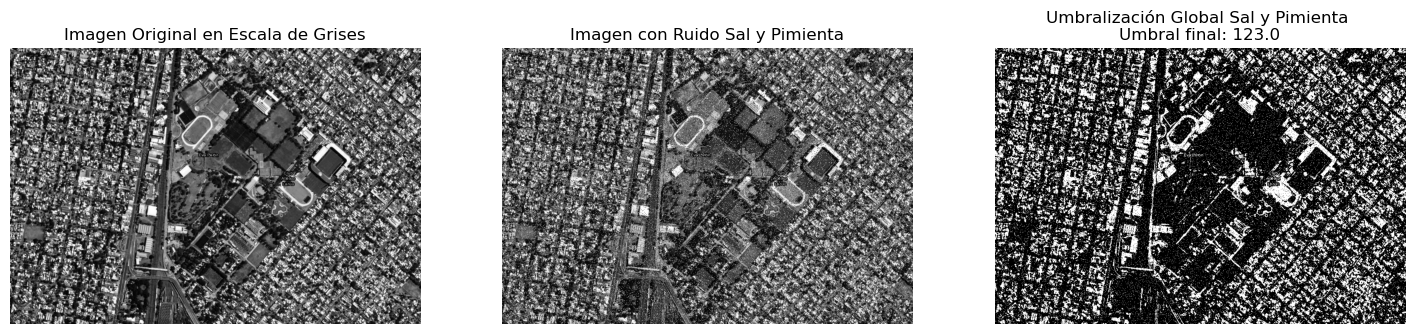

In [48]:
# Función para agregar ruido sal y pimienta
def agregar_ruido_sal_pimienta(imagen, prob=0.1):
    imagen_ruido = np.copy(imagen)
    num_salt = int(np.ceil(prob * imagen.size * 0.5))
    num_pepper = int(np.ceil(prob * imagen.size * 0.5))

    # Coordenadas de sal
    salt_coords = (np.random.randint(0, imagen.shape[0], num_salt),
                   np.random.randint(0, imagen.shape[1], num_salt))
    imagen_ruido[salt_coords] = 255  # Blanco para 'sal'

    # Coordenadas de pimienta
    pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper),
                     np.random.randint(0, imagen.shape[1], num_pepper))
    imagen_ruido[pepper_coords] = 0  # Negro para 'pimienta'

    return imagen_ruido

# Aplicar el ruido sal y pimienta a la imagen en escala de grises
imagen_ruido_sal_pimienta = agregar_ruido_sal_pimienta(gray_image)

# Paso 1: Seleccionar un umbral inicial
T = 127  # Umbral inicial (puede ser cualquier valor entre 0 y 255, excepto 0 y 255)
delta_T = 1  # Diferencia mínima entre valores de T sucesivos
T_prev = 0  # Para almacenar el umbral anterior y verificar la convergencia

while abs(T - T_prev) >= delta_T:
    T_prev = T

    # Paso 2: Umbralizar la imagen usando T
    G1 = imagen_ruido_sal_pimienta[imagen_ruido_sal_pimienta > T]  # Grupo de píxeles con intensidad mayor a T
    G2 = imagen_ruido_sal_pimienta[imagen_ruido_sal_pimienta <= T] # Grupo de píxeles con intensidad menor o igual a T

    # Paso 4: Calcular m1 y m2
    if len(G1) > 0:
        m1 = np.mean(G1)
    else:
        m1 = 0

    if len(G2) > 0:
        m2 = np.mean(G2)
    else:
        m2 = 0

    # Paso 5: Actualizar el umbral T
    T = int((m1 + m2) / 2)

# Aplicar el umbral final a la imagen
umbral_valor_sp, imagen_global_sal_pimienta = cv2.threshold(imagen_ruido_sal_pimienta, T, 255, cv2.THRESH_BINARY)

# Imprimir el valor de umbral calculado por Global
print(f"Umbral calculado por Global: {umbral_valor_sp}")

# Mostrar la imagen original, la imagen con ruido de sal y pimienta y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido sal y pimienta
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_sal_pimienta, cmap='gray')
plt.title('Imagen con Ruido Sal y Pimienta')
plt.axis('off')

# Imagen umbralizada Global
plt.subplot(1, 3, 3)
plt.imshow(imagen_global_sal_pimienta, cmap='gray')
plt.title(f'Umbralización Global Sal y Pimienta \nUmbral final: {umbral_valor_sp}')
plt.axis("off")

plt.show()

### Comparación de todos los resultados


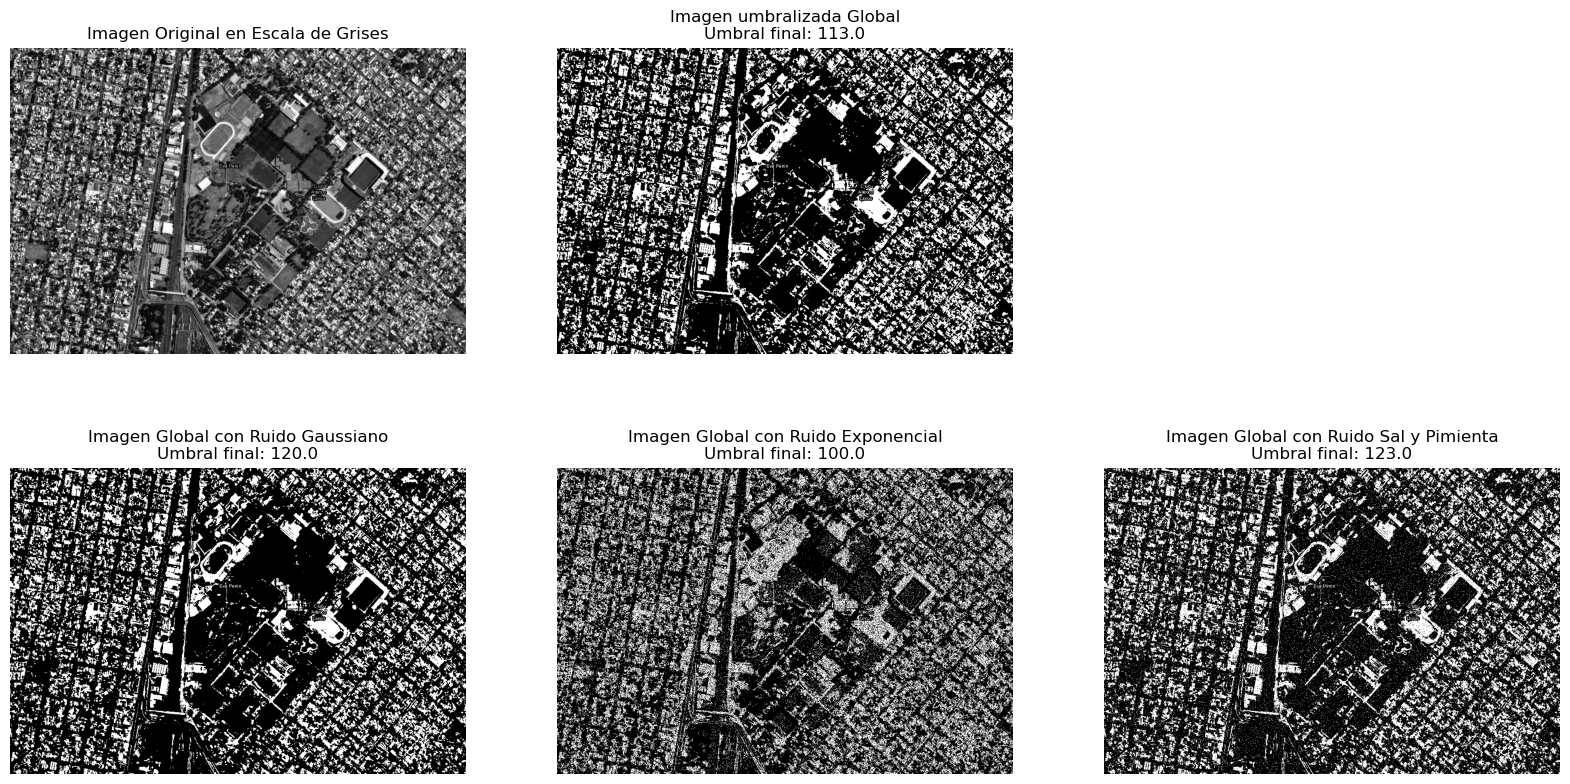

In [49]:
# Mostrar la imagen original, las bandas binarias y la imagen clasificada final
plt.figure(figsize=(20, 10))

# Mostrar la imagen original en la primera posición (arriba)
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title(f'Imagen Original en Escala de Grises')
plt.axis('off')

# Mostrar la imagen clasificada final en la segunda posición (arriba)
plt.subplot(2, 3, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Imagen umbralizada Global\nUmbral final: {umbral_valor}')
plt.axis('off')

# Mostrar las bandas binarias en la fila inferior
plt.subplot(2, 3, 4)
plt.imshow(imagen_global_gaussiana, cmap='gray')
plt.title(f'Imagen Global con Ruido Gaussiano\nUmbral final: {umbral_valor_gaussiano}')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(imagen_global_exponencial, cmap='gray')
plt.title(f'Imagen Global con Ruido Exponencial\nUmbral final: {umbral_valor_exponencial}')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(imagen_global_sal_pimienta, cmap='gray')
plt.title(f'Imagen Global con Ruido Sal y Pimienta\nUmbral final: {umbral_valor_sp}')
plt.axis('off')

plt.show()